# Pytsal Anomaly Detection Tutorial

**Created using: Pytsal 1.1.0**

**Date Updated: May 08, 2021**

**Tutorial Author: Krishnan S G**


## 1.0 Tutorial Objective

Welcome to Anomaly detection Tutorial. This tutorial assumes that you are new to Pytsal and looking to get started with Anomaly detection using the `pytsal.anomaly` Module.

In this tutorial we will learn:

* **Getting Data**: How to import data from Pytsal repository
* **Setting up Environment**: How to setup an experiment in Pytsal and get started with building forecasting models
* **Perform anomaly detection**: Create anomaly detection model and generate insights and plots

Read Time : Approx. 15 Minutes

## 1.1 Installing Pytsal

The first step to get started with Pytsal is to install Pytsal. Installation is easy and will only take a few minutes. Follow the instructions below:

#### Installing Pytsal in Local Jupyter Notebook

```pip install pytsal```

#### Installing Pytsal on Google Colab or Azure Notebooks

```!pip install pytsal```

## 1.2 Pre-Requisites

* Python 3.6 or greater
* Pytsal 1.0 or greater
* Basic Knowledge of time series analysis

## Anomaly Detection using Brutlag algorithm

Anomaly detection problem for time series is usually formulated as finding outlier data points relative to some standard.


### What is Brutlag algorithm?
The algorithm is an extension to Holt-Winter model. The data points within the confidence bands are considered to be normal and data points outside the bands are considered to be anomalies.

### Formula
![](https://latex.codecogs.com/svg.latex?d_t%20%3D%20%5Cgamma%20%5Cleft%20%7C%20D_t-P_t%20%5Cright%20%7C&plus;%281-%5Cgamma%20%29d_%7Bt-p%7D%5C%5C%20UB%20%3D%20a_%7Bt-1%7D&plus;b_%7Bt-1%7D&plus;c_%7Bt-p%7D%20&plus;%20m*d_%7Bt-p%7D%20%5C%5C%20LB%20%3D%20a_%7Bt-1%7D&plus;b_%7Bt-1%7D&plus;c_%7Bt-p%7D%20-%20m*d_%7Bt-p%7D)

- **UB** - upper confidence band.
- **LB** - lower confidence band.
- **a** - level at time **t**.
- **b** - trend/slope component at time **t**.
- **c** - seasonal component at time **t**.
- **γ** - smoothing parameter for seasonality.
- **p** - period for the time series.
- **m** - brutlag scaling factor.


The following graphs illustrates how Holt-Winter's model and brutlag algorithm are used to identify anomalies present in the time series.

![](https://raw.githubusercontent.com/KrishnanSG/holt-winters/70f540a98b67da645d170e3706ea0cc427a83fae/plots/anomaly_2016-17.png)

## 3. Getting the data

Pytsal has a set of datasets available in-built with the package for easy prototyping and test. In future further more dataset would be added under [datasets folder](https://github.com/KrishnanSG/pytsal/tree/master/pytsal/internal/datasets)

### Loading Airline Anomaly dataset

In [4]:
from pytsal.dataset import load_airline_with_anomaly

ts_with_anomaly = load_airline_with_anomaly()

print(ts_with_anomaly.summary())
print('\n### Data ###\n')
print(ts)

name             Monthly totals of international airline passen...
freq                                                            MS
target                                Number of airline passengers
type                                                    Univariate
phase                                                         Full
series_length                                                  144
start                                1949-01-01T00:00:00.000000000
end                                  1960-12-01T00:00:00.000000000
dtype: object

### Data ###

Date
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    806.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: Number of airline passengers, Length: 144, dtype: float64


## 4. Anomaly detection

The `setup()` function initializes the environment in pytsal and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pytsal.

It takes three mandatory parameters: a pytsal timeseries object, pretrained model on true datapoints and algorithm name. All other parameters are optional and are used to customize the detection algorithm.

INFO:pytsal.forecasting:Model loaded from trained_model.pytsal
INFO:pytsal.anomaly:Initializing anomaly detection algorithm ...
INFO:pytsal.anomaly:Performing brutlag anomaly detection ...



Difference between actual and predicted

            actual   predicted  difference          UB          LB
Date                                                              
1949-01-01   112.0  111.597879    0.402121  111.894179  111.301580
1949-02-01   118.0  118.844235   -0.844235  119.466303  118.222167
1949-03-01   132.0  133.334951   -1.334951  134.318598  132.351303
1949-04-01   129.0  127.901291    1.098709  128.710866  127.091716
1949-05-01   121.0  120.978657    0.021343  120.994383  120.962931
...            ...         ...         ...         ...         ...
1960-08-01   806.0  629.401661  176.598339  777.055549  481.747774
1960-09-01   508.0  511.999611   -3.999611  526.870807  497.128415
1960-10-01   461.0  448.034311   12.965689  461.492408  434.576214
1960-11-01   390.0  397.252045   -7.252045  410.320435  384.183654
1960-12-01   432.0  437.148733   -5.148733  455.348908  418.948557

[144 rows x 5 columns]

The data points classified as anomaly

            observed   

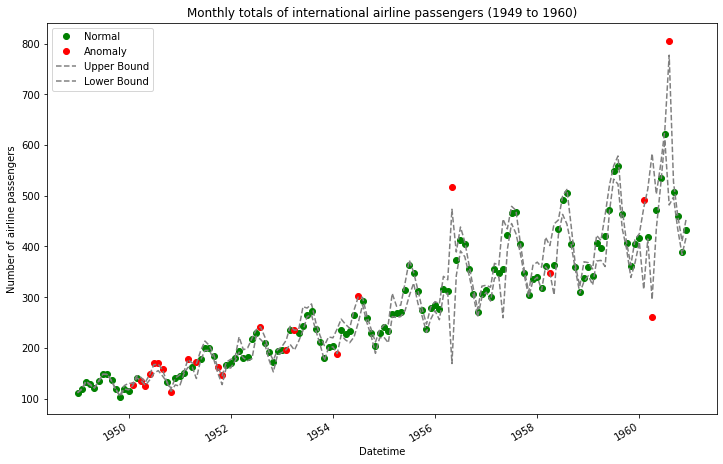

In [5]:
import pytsal.forecasting as f
import pytsal.anomaly as ad

# 2.a Load model if exists
model = f.load_model()

# 2.b Create new model
if model is None:
    ts = load_airline()
    model = f.setup(ts, 'holtwinter', eda=False, validation=False, find_best_model=True, plot_model_comparison=False)
    trained_model = f.finalize(ts, model)
    f.save_model(trained_model)
    model = f.load_model()

# 3. brutlag algorithm finds and returns the anomaly points
anomaly_points = ad.setup(ts_with_anomaly, model, 'brutlag')

## 5. Anomaly Inference

The output of the algorithm is a set of anomaly points detected by the algorithm

In [6]:
anomaly_points

,observed,expected
date,,
1950-02-01,126.0,128.059727
1950-04-01,135.0,138.509348
1950-05-01,125.0,129.101410
1950-06-01,149.0,142.206329
1950-07-01,170.0,158.283047
1950-08-01,170.0,161.587288
1950-09-01,158.0,150.452400
1950-11-01,114.0,117.014615
1951-03-01,178.0,169.289631


## 6. Hurray!

This tutorial has covered how to perform basic anomaly detection using brutlag algorithm and derive insights and visualizations. We have completed all of these steps in **less than 5 commands!**